In [21]:
import numpy as np 
import matplotlib.pyplot as plt
import scienceplots
from models.HH import *
from models.LIF import * 
from models.Ishikevich import *
from models.morrislecar import *
from utils.load import *
import matplotlib.animation as animation

In [22]:
plt.style.use('science')
plt.rcParams["figure.figsize"] = (12,7)


In [23]:
params_IZH = load_ISH(b = -3.3)
params_IZH2 = load_ISH()
k_izh = 0.04
dt = 0.01
t_final = 300
Isyn = [[0, 0.05], [0.05, 0]]
Is = np.array(Isyn)
tau = 1

In [26]:
Isyn = np.zeros((2 , 2 ))
I = np.zeros((int(t_final/dt),2))
I[:,0] = 2.0
order = 2
y0 = [-65 , -65]
u0 = [0.0,0.0]
dt=0.01
t_final=100

data4B_Ish, complete_Ish_4B = rk_ish(dt,t_final,order,y0,u0,I,Is,*params_IZH,k_izh,tau,)
data2, complete_2 = rk_ish(dt,t_final,order,y0,u0,I,Is,*params_IZH2,k_izh,tau,)

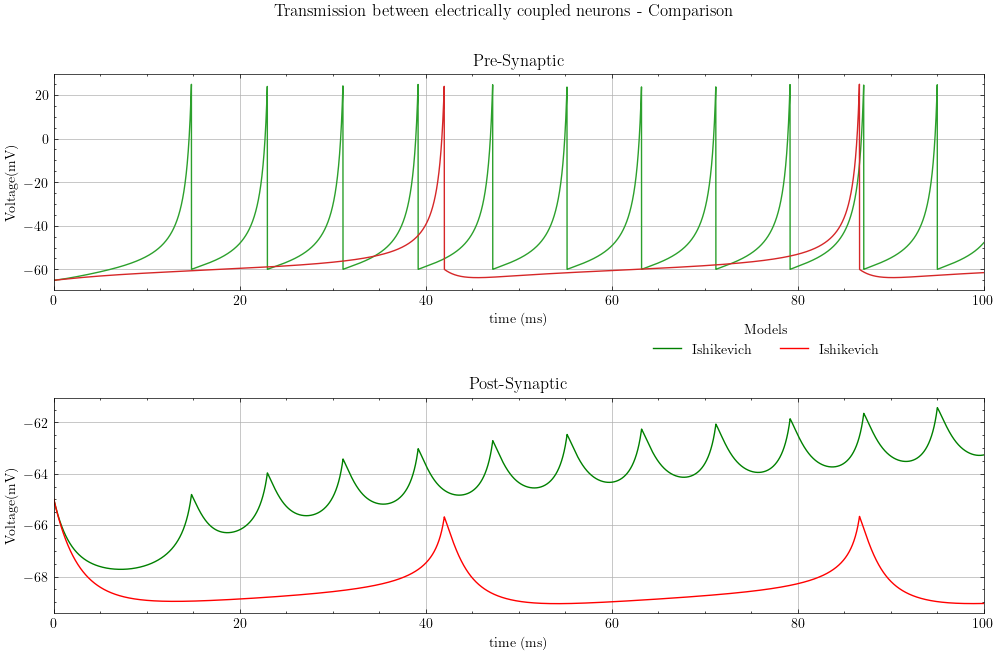

In [27]:
time = np.linspace(0,t_final,int(t_final/dt))

fig, (ax1, ax2) = plt.subplots(2,1) 

fig.subplots_adjust(hspace=0.5)
ax1.set_xlabel('time (ms)')
ax2.set_xlabel('time (ms)')

ax1.set_ylabel('Voltage(mV)')
ax2.set_ylabel('Voltage(mV)')

ax1.set_xlim(0,100)
ax2.set_xlim(0,100)


plt.suptitle('Transmission between electrically coupled neurons - Comparison')

ax1.title.set_text('Pre-Synaptic')
ax1.plot(time,data4B_Ish[:,0], color = 'tab:green', label = 'Ishikevich')
ax1.plot(time,data2[:,0], color = 'tab:red', label = 'Ishikevich')


ax2.title.set_text('Post-Synaptic')

ax2.plot(time,data4B_Ish[:,1], label = 'Ishikevich', color = 'green')
ax2.plot(time,data2[:,1], label = 'Ishikevich', color = 'red')
#ax2.plot(time,complete_Ish_4B[:,1], label = 'Ishikevich', color = 'red')

ax2.legend(title = 'Models',bbox_to_anchor=(0.9, 1.4), ncols = 2)
ax1.grid()
ax2.grid()

plt.show()

In [28]:
def phases(data,dt):
    points1 = np.zeros(len(data[:,0]))
    points2 = np.zeros(len(data[:,1]))
    num_points1 = 0
    num_points2 = 0
    for i in range(1,len(data)-2):
        if  (data[i-1,0] < data[i,0] and data[i,0] > data[i+1,0] ) or (data[i-1,0] > data[i,0] and data[i,0] < data[i+1,0]):
            points1[num_points1] = i * dt
            num_points1 = num_points1 +1
        if  (data[i-1,1] < data[i,1] and data[i,1] > data[i+1,1] ) or (data[i-1,1] > data[i,1] and data[i,1] < data[i+1,1]):
            points2[num_points2] = i * dt
            num_points2 = num_points2 +1
    time_dif = 0
    for i in range(0,num_points1-1):
        time_dif = time_dif + (points1[i] - points2[i])
    time_dif = time_dif/num_points1
    return abs(time_dif),float(points1[i])

In [29]:

t_final = 4000
I = np.zeros((int(t_final/dt),2))
t = np.linspace(0,t_final,int(t_final/dt))

f_log = np.linspace(-3,-1,int(2/0.1))
f = 10**f_log
mean = np.zeros((len(f),1))
phases_test = np.zeros((len(f),1))
residue = 0


for i in range(0,len(f)):
    I[:,0] = 1.0 + 0.5*np.sin(2 * np.pi * f[i] * t)
    #data4b_Ish, complete_Ish_4b = rk_ish(dt,t_final,order,y0,u0,C,I,Is,vr,vt,k_ish,a,b,c,d,k_2,tau,vpeak)
    data4b_Ish, complete_Ish_4b = rk_ish(dt,t_final,order,y0,u0,I,Is,*params_IZH,k_izh,tau)
    end = len(data4b_Ish)
    if i < 9:
        mean[i] = ( np.max(data4b_Ish[10000:end-1,1]) - np.min(data4b_Ish[10000:end-1,1]) ) / ( np.max(data4b_Ish[10000:end-1,0]) - np.min(data4b_Ish[10000:end-1,0]) )
        time_diff, residue  = phases(data4b_Ish[10000:end-1],dt)
        phases_test[i] = 360 * f[i] * time_diff
    else:
        mean[i] = ( np.max(data4b_Ish[10000:end-1,1]) - np.min(data4b_Ish[10000:end-1,1]) ) / ( np.max(data4b_Ish[10000:end-1,0]) - np.min(data4b_Ish[10000:end-1,0]) )
        time_diff, residue  = phases(data4b_Ish,dt)
        phases_test[i] = 360 * f[i] * time_diff
f = 1000*f 
mean = mean * 100 
for i in range(1,len(f)):
    mean[i] = mean[i] * 100 / mean[0]
    #print(mean[0],mean[i])

mean[0] = 100

fISH = f
meanISH = mean 
phasesISH= phases_test

In [30]:

t_final = 4000
I = np.zeros((int(t_final/dt),2))
t = np.linspace(0,t_final,int(t_final/dt))

f_log = np.linspace(-3,-1,int(2/0.1))
f = 10**f_log
mean = np.zeros((len(f),1))
phases_test = np.zeros((len(f),1))
residue = 0


for i in range(0,len(f)):
    I[:,0] = 1.0 + 0.5*np.sin(2 * np.pi * f[i] * t)
    #data4b_Ish, complete_Ish_4b = rk_ish(dt,t_final,order,y0,u0,C,I,Is,vr,vt,k_ish,a,b,c,d,k_2,tau,vpeak)
    data4b_Ish, complete_Ish_4b = rk_ish(dt,t_final,order,y0,u0,I,Is,*params_IZH2,k_izh,tau)
    end = len(data4b_Ish)
    if i < 9:
        mean[i] = ( np.max(data4b_Ish[10000:end-1,1]) - np.min(data4b_Ish[10000:end-1,1]) ) / ( np.max(data4b_Ish[10000:end-1,0]) - np.min(data4b_Ish[10000:end-1,0]) )
        time_diff, residue  = phases(data4b_Ish[10000:end-1],dt)
        phases_test[i] = 360 * f[i] * time_diff
    else:
        mean[i] = ( np.max(data4b_Ish[10000:end-1,1]) - np.min(data4b_Ish[10000:end-1,1]) ) / ( np.max(data4b_Ish[10000:end-1,0]) - np.min(data4b_Ish[10000:end-1,0]) )
        time_diff, residue  = phases(data4b_Ish,dt)
        phases_test[i] = 360 * f[i] * time_diff
f = 1000*f 
mean = mean * 100 
for i in range(1,len(f)):
    mean[i] = mean[i] * 100 / mean[0]
    #print(mean[0],mean[i])

mean[0] = 100

fISH2 = f
meanISH2 = mean 
phasesISH2= phases_test

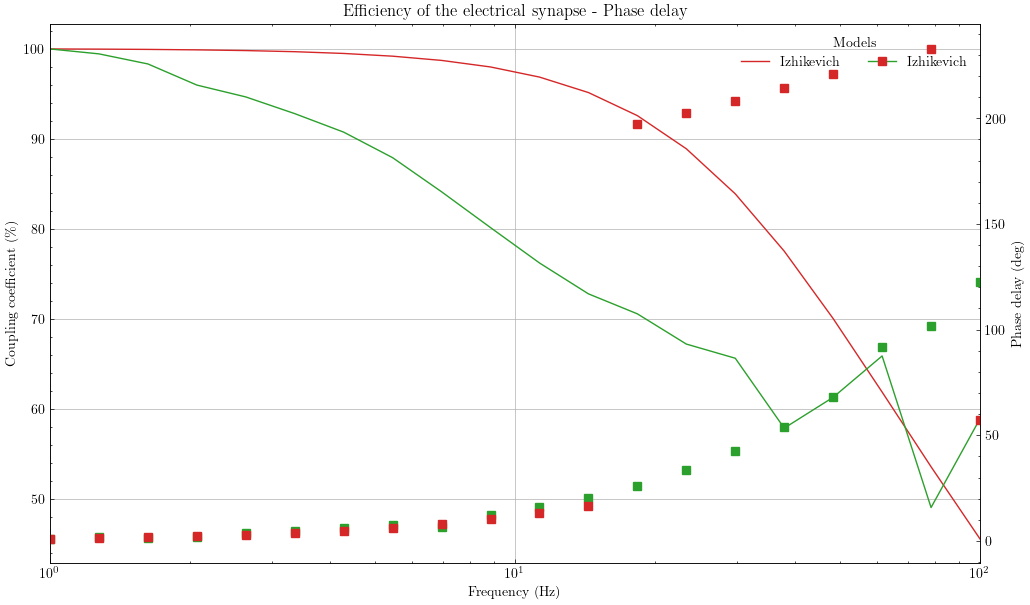

In [31]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_title('Efficiency of the electrical synapse - Phase delay')
ax1.set_xscale('log')

ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Coupling coefficient (\%)')
ax1.set_xlim(1,100)

ax2.set_ylabel('Phase delay (deg)')


ax2.plot(fISH,phasesISH, 's', color = 'tab:green')

ax2.plot(fISH2,phasesISH2, 's', color = 'tab:red')
ax1.plot(fISH2, meanISH2,color = 'tab:red', label = 'Izhikevich')
ax1.plot(fISH, meanISH,color = 'tab:green', label = 'Izhikevich')


ax1.legend(title='Models',ncols=2)
ax1.grid()